## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
diabetes_data["Glucose"] = diabetes_data["Glucose"].replace(0, np.nan)
diabetes_data["BloodPressure"] = diabetes_data["BloodPressure"].replace(0, np.nan)
diabetes_data["SkinThickness"] = diabetes_data["SkinThickness"].replace(0, np.nan)
diabetes_data["Insulin"] = diabetes_data["Insulin"].replace(0, np.nan)
diabetes_data["BMI"] = diabetes_data["BMI"].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

Text(0.5, 1.0, 'A histogram of pregnancies')

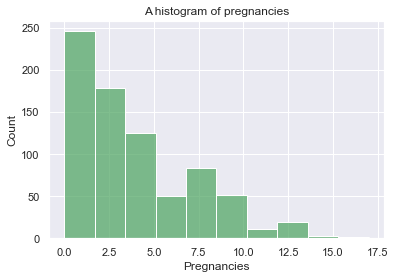

In [6]:
sns.histplot(data = diabetes_data, x= 'Pregnancies', bins = 10, color = 'g') 
plt.xlabel('Pregnancies') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of pregnancies')

Text(0.5, 1.0, 'A histogram of Glucose')

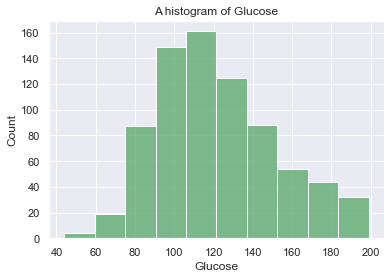

In [7]:
sns.histplot(data = diabetes_data, x= 'Glucose', bins = 10, color = 'g') 
plt.xlabel('Glucose') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of Glucose')

Text(0.5, 1.0, 'A histogram of Pressure')

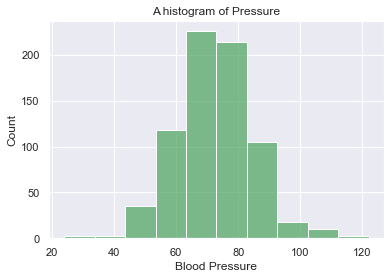

In [8]:
sns.histplot(data = diabetes_data, x= 'BloodPressure', bins = 10, color = 'g') 
plt.xlabel('Blood Pressure') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of Pressure')

Text(0.5, 1.0, 'A histogram of Skin Thickness')

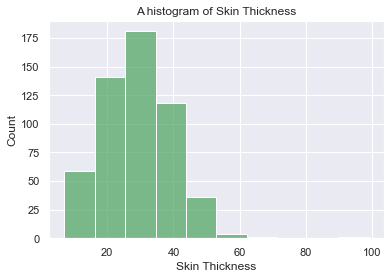

In [9]:
sns.histplot(data = diabetes_data, x= 'SkinThickness', bins = 10, color = 'g') 
plt.xlabel('Skin Thickness') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of Skin Thickness')

Text(0.5, 1.0, 'A histogram of Insulin')

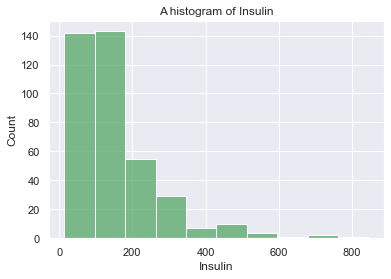

In [10]:
sns.histplot(data = diabetes_data, x= 'Insulin', bins = 10, color = 'g') 
plt.xlabel('Insulin') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of Insulin')

Text(0.5, 1.0, 'A histogram of BMI')

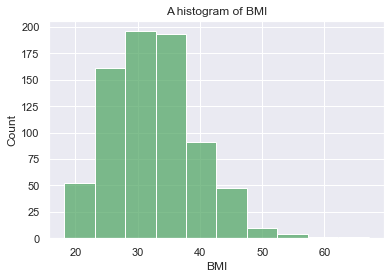

In [11]:
sns.histplot(data = diabetes_data, x= 'BMI', bins = 10, color = 'g') 
plt.xlabel('BMI') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of BMI')

Text(0.5, 1.0, 'A histogram of Diabetes Pedigree Function')

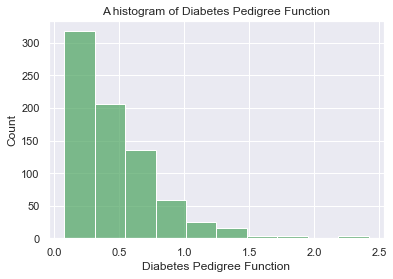

In [12]:
sns.histplot(data = diabetes_data, x= 'DiabetesPedigreeFunction', bins = 10, color = 'g') 
plt.xlabel('Diabetes Pedigree Function') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of Diabetes Pedigree Function')

Text(0.5, 1.0, 'A histogram of Age')

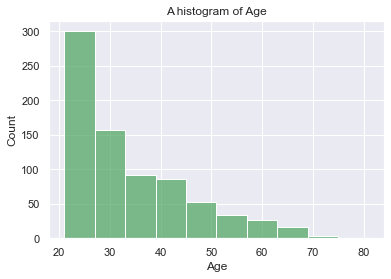

In [13]:
sns.histplot(data = diabetes_data, x= 'Age', bins = 10, color = 'g') 
plt.xlabel('Age') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A histogram of Age')

Text(0.5, 1.0, 'A Countplot of Outcome')

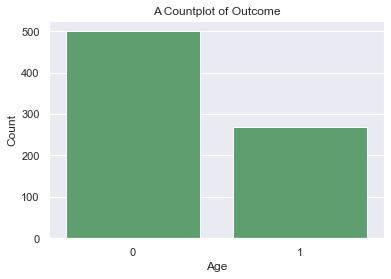

In [14]:
sns.countplot(data = diabetes_data, x= 'Outcome', color = 'g') 
plt.xlabel('Age') #come to the features argument later as well. 
plt.ylabel('Count')
plt.title('A Countplot of Outcome')

#### Replace the zeros with mean and median values.

In [15]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

Text(0.5, 1.0, 'A histogram of pregnancies')

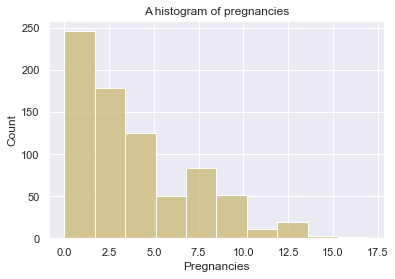

In [16]:
sns.histplot(data = diabetes_data, x= 'Pregnancies', bins = 10, color = 'y') 
plt.xlabel('Pregnancies')  
plt.ylabel('Count')
plt.title('A histogram of pregnancies')

Text(0.5, 1.0, 'A histogram of Glucose')

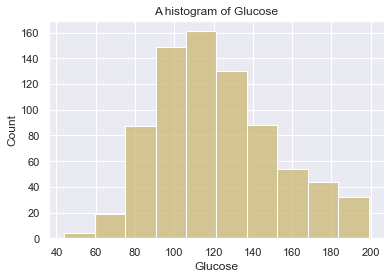

In [17]:
sns.histplot(data = diabetes_data, x= 'Glucose', bins = 10, color = 'y') 
plt.xlabel('Glucose') 
plt.ylabel('Count')
plt.title('A histogram of Glucose')

Text(0.5, 1.0, 'A histogram of Pressure')

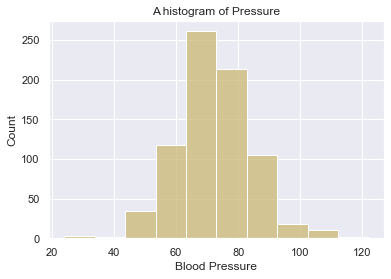

In [18]:
sns.histplot(data = diabetes_data, x= 'BloodPressure', bins = 10, color = 'y') 
plt.xlabel('Blood Pressure')  
plt.ylabel('Count')
plt.title('A histogram of Pressure')

Text(0.5, 1.0, 'A histogram of Skin Thickness')

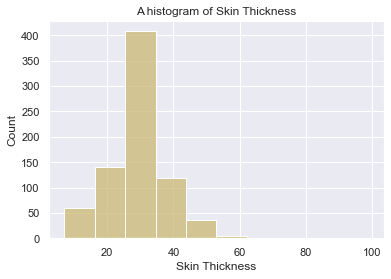

In [19]:
sns.histplot(data = diabetes_data, x= 'SkinThickness', bins = 10, color = 'y') 
plt.xlabel('Skin Thickness')  
plt.ylabel('Count')
plt.title('A histogram of Skin Thickness')

Text(0.5, 1.0, 'A histogram of Insulin')

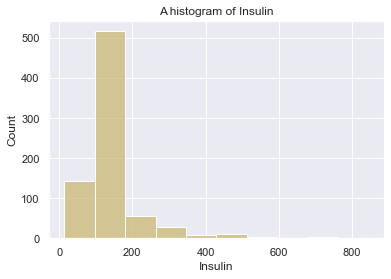

In [20]:
sns.histplot(data = diabetes_data, x= 'Insulin', bins = 10, color = 'y') 
plt.xlabel('Insulin')  
plt.ylabel('Count')
plt.title('A histogram of Insulin')

Text(0.5, 1.0, 'A histogram of BMI')

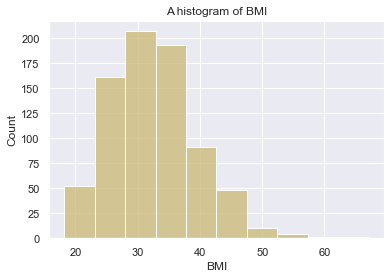

In [21]:
sns.histplot(data = diabetes_data, x= 'BMI', bins = 10, color = 'y') 
plt.xlabel('BMI') 
plt.ylabel('Count')
plt.title('A histogram of BMI')

Text(0.5, 1.0, 'A histogram of Diabetes Pedigree Function')

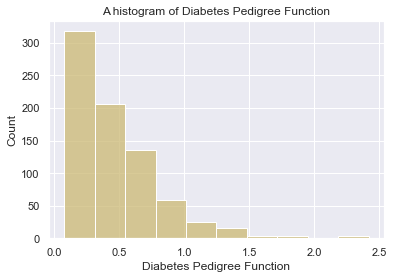

In [22]:
sns.histplot(data = diabetes_data, x= 'DiabetesPedigreeFunction', bins = 10, color = 'y') 
plt.xlabel('Diabetes Pedigree Function') 
plt.ylabel('Count')
plt.title('A histogram of Diabetes Pedigree Function')

Text(0.5, 1.0, 'A histogram of Age')

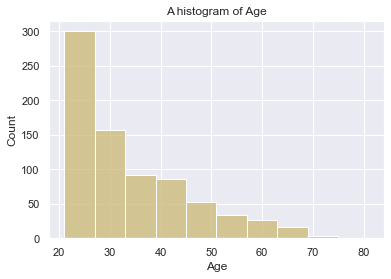

In [23]:
sns.histplot(data = diabetes_data, x= 'Age', bins = 10, color = 'y') 
plt.xlabel('Age') 
plt.ylabel('Count')
plt.title('A histogram of Age')

Text(0.5, 1.0, 'A Countplot of Outcome')

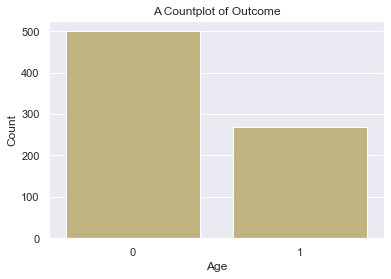

In [24]:
sns.countplot(data = diabetes_data, x= 'Outcome', color = 'y') 
plt.xlabel('Age')  
plt.ylabel('Count')
plt.title('A Countplot of Outcome')

#### Plot the correlation matrix heatmap

Correlation between various features


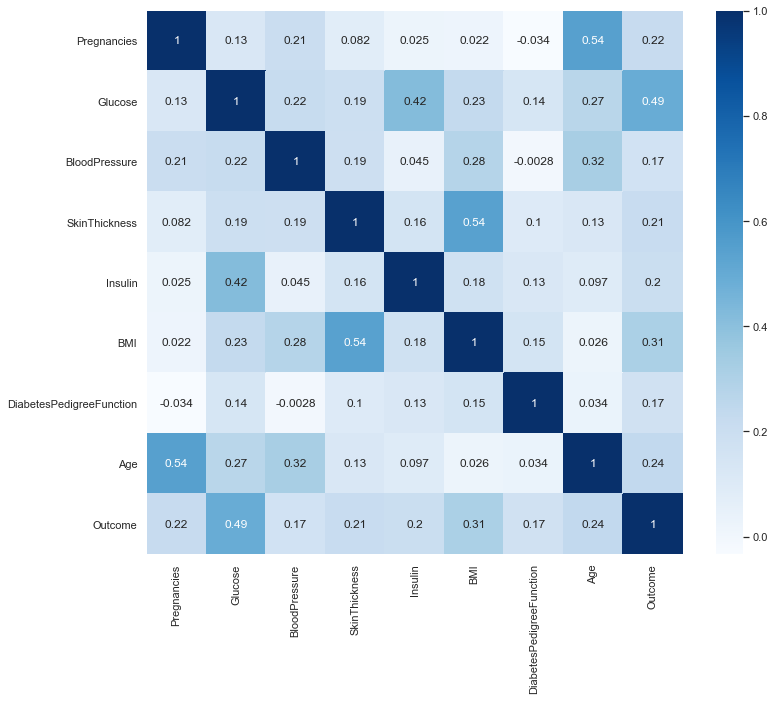

In [25]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [26]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_data[features]
y = diabetes_data['Outcome']

In [27]:
from sklearn.model_selection import train_test_split

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_test)

array([[ 0.96714133,  0.47937396,  0.12122715, ..., -0.90106382,
         0.53734346,  1.47930079],
       [-0.82270897,  0.98157028, -0.97886215, ..., -0.88653009,
        -0.86878331, -0.94617312],
       [ 0.66883295, -0.42457942, -0.97886215, ..., -1.04640105,
        -0.78766061, -0.52798796],
       ...,
       [-0.82270897, -1.02721501, -1.450329  , ..., -1.01733361,
        -0.70353337, -0.86253609],
       [ 1.86206648,  1.55072612,  0.12122715, ...,  0.84298305,
         0.20684358,  0.05747126],
       [ 1.5637581 , -0.32414016,  0.74984961, ...,  0.29070154,
        -0.62541522,  0.22474532]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [30]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [31]:
for i, j in zip(range(1,10), train_scores):
    print('The score for', i ,'is', j)

The score for 1 is 1.0
The score for 2 is 0.8342644320297952
The score for 3 is 0.8361266294227188
The score for 4 is 0.7951582867783985
The score for 5 is 0.7858472998137802
The score for 6 is 0.7746741154562383
The score for 7 is 0.7690875232774674
The score for 8 is 0.7672253258845437
The score for 9 is 0.7672253258845437


In [32]:
for a, b in zip(range(1,10), test_scores):
    print('The score for', a ,'is', b)

The score for 1 is 0.7316017316017316
The score for 2 is 0.7402597402597403
The score for 3 is 0.7575757575757576
The score for 4 is 0.7402597402597403
The score for 5 is 0.7792207792207793
The score for 6 is 0.7965367965367965
The score for 7 is 0.7748917748917749
The score for 8 is 0.7662337662337663
The score for 9 is 0.7662337662337663


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

Maximum score in the training dataset is 3 number of neighbors. 

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

Maximum score in the test dataset is 6 number of neighbors.

Plot the train and test model performance by number of neighbors.

/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/shikshya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


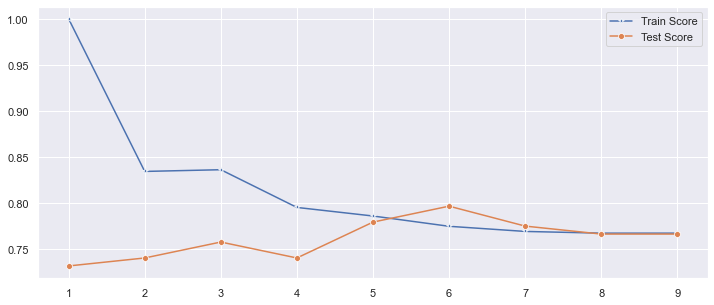

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [34]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn1.fit(X_train, y_train)
#y_pred = knn_model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_pred = knn_model.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[120  26]
 [ 30  55]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

Confusion matrix, without normalization
[[120  26]
 [ 30  55]]
Normalized confusion matrix
[[0.82191781 0.17808219]
 [0.35294118 0.64705882]]


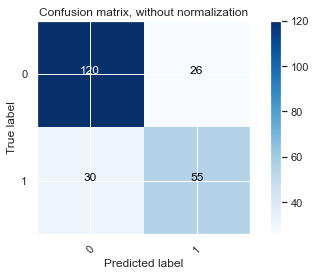

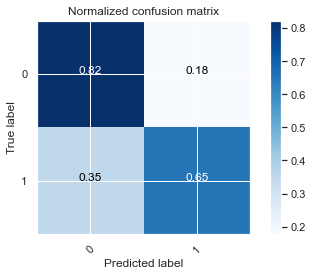

In [36]:
import itertools
class_names = [0,1]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

**<font color='teal'> Print the classification report </font>**

In [37]:
print(classification_report(y_test, y_pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       146
           1       0.68      0.65      0.66        85

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [39]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [49]:
from sklearn.ensemble import RandomForestClassifier
#https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv
clf = RandomForestClassifier(random_state = 42)
param_grid1 = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [50]:

clf_cv = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
clf_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [51]:
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Logistic Regression Parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 1000}
Best score is 0.7722264663441134


In [53]:
rfc1=RandomForestClassifier(random_state=42, max_features=3, n_estimators= 1000, max_depth=80, min_samples_leaf= 5, min_samples_split= 12)

In [54]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=1000,
                       random_state=42)

In [55]:
y_pred=rfc1.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.7922077922077922
